In [27]:
!pip3 install tqdm

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 76 kB 1.5 MB/s eta 0:00:01
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [28]:
# Импорт необходимых библиотек
import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from dateutil.relativedelta import relativedelta

# Source: https://www.statsmodels.org/stable/install.html
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Source: https://scikit-learn.org/stable/install.html
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# **Предобработка данных**

In [60]:
df_n = pd.read_csv("content/Netflix_Historical_StockPrice2.csv")
df_n.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2021-03-22,509.130005,529.309998,509.130005,523.109985,523.109985,3360600
1256,2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
1257,2021-03-24,533.780029,534.419983,520.000000,520.809998,520.809998,4102200
1258,2021-03-25,516.989990,518.530029,497.000000,502.859985,502.859985,4926800
1259,2021-03-26,502.820007,508.720001,496.679993,508.049988,508.049988,3464200


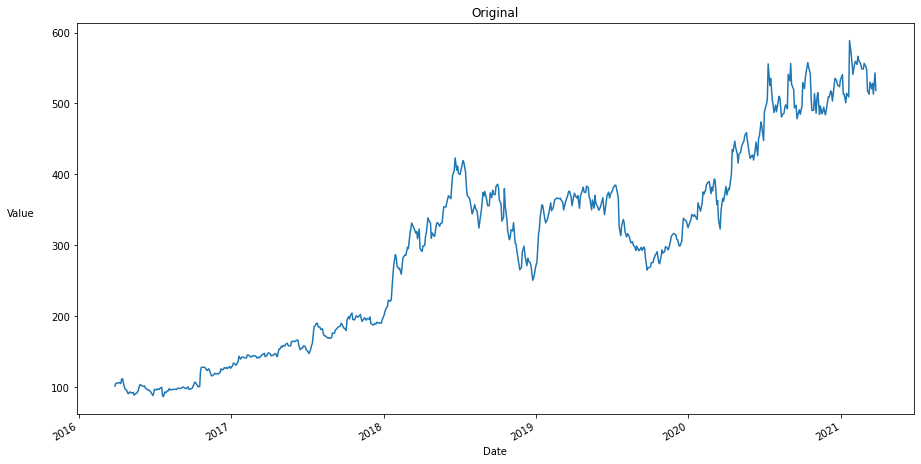

In [84]:
plt.figure(figsize=(15, 8))
plt.title('Original')
plt.ylabel('Value', rotation=0, labelpad=30)
df['High'].plot();

,Date,Open,High,Low,Close,Adj Close,Volume
1250,2021-03-15,516.320007,520.729980,508.029999,520.250000,520.250000,3484300
1252,2021-03-17,522.000000,528.369995,514.299988,524.440002,524.440002,2792800
1254,2021-03-19,504.959991,513.190002,501.630005,512.179993,512.179993,4384500
1256,2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
1258,2021-03-25,516.989990,518.530029,497.000000,502.859985,502.859985,4926800


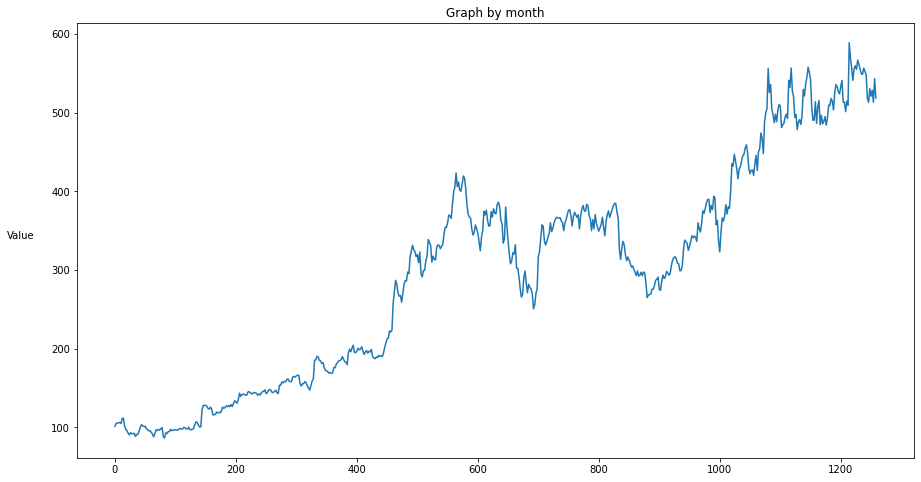

In [65]:
from datetime import date

df = df_n.iloc[::2, :]

plt.figure(figsize=(15, 8))
plt.title('Graph by month')
plt.ylabel('Value', rotation=0, labelpad=30)
df['High'].plot();
df.tail()

In [66]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

df = df.set_index(['Date'])
df.sort_index(inplace=True)
df.tail()

/var/folders/2x/dlzlkrx57pv_j1qcp6kjgw0w0000gn/T/ipykernel_3846/3121350946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,516.320007,520.729980,508.029999,520.250000,520.250000,3484300
2021-03-17,522.000000,528.369995,514.299988,524.440002,524.440002,2792800
2021-03-19,504.959991,513.190002,501.630005,512.179993,512.179993,4384500
2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
2021-03-25,516.989990,518.530029,497.000000,502.859985,502.859985,4926800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,516.320007,520.729980,508.029999,520.250000,520.250000,3484300
2021-03-17,522.000000,528.369995,514.299988,524.440002,524.440002,2792800
2021-03-19,504.959991,513.190002,501.630005,512.179993,512.179993,4384500
2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
2021-03-25,516.989990,518.530029,497.000000,502.859985,502.859985,4926800


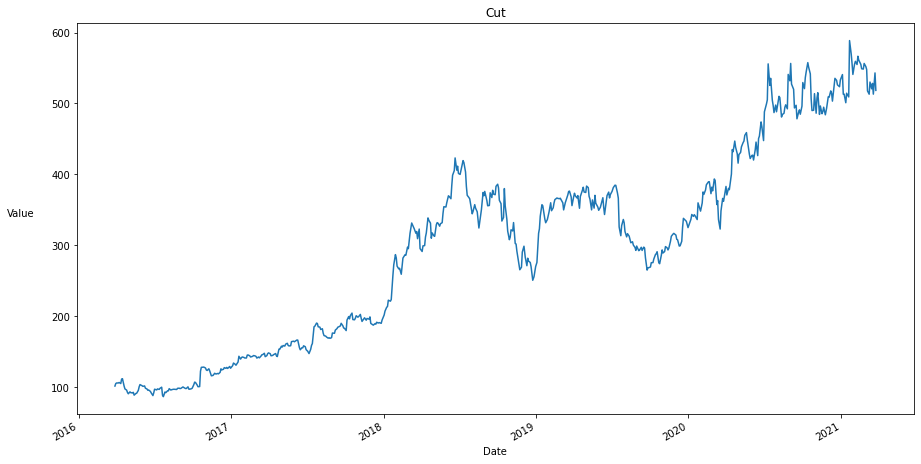

In [67]:
df = df.loc['2010-01-01':]

plt.figure(figsize=(15, 8))
plt.title('Cut')
plt.ylabel('Value', rotation=0, labelpad=30)
df['High'].plot();
df.tail()

# **Исследование данных на наличие тренда/сезонность**

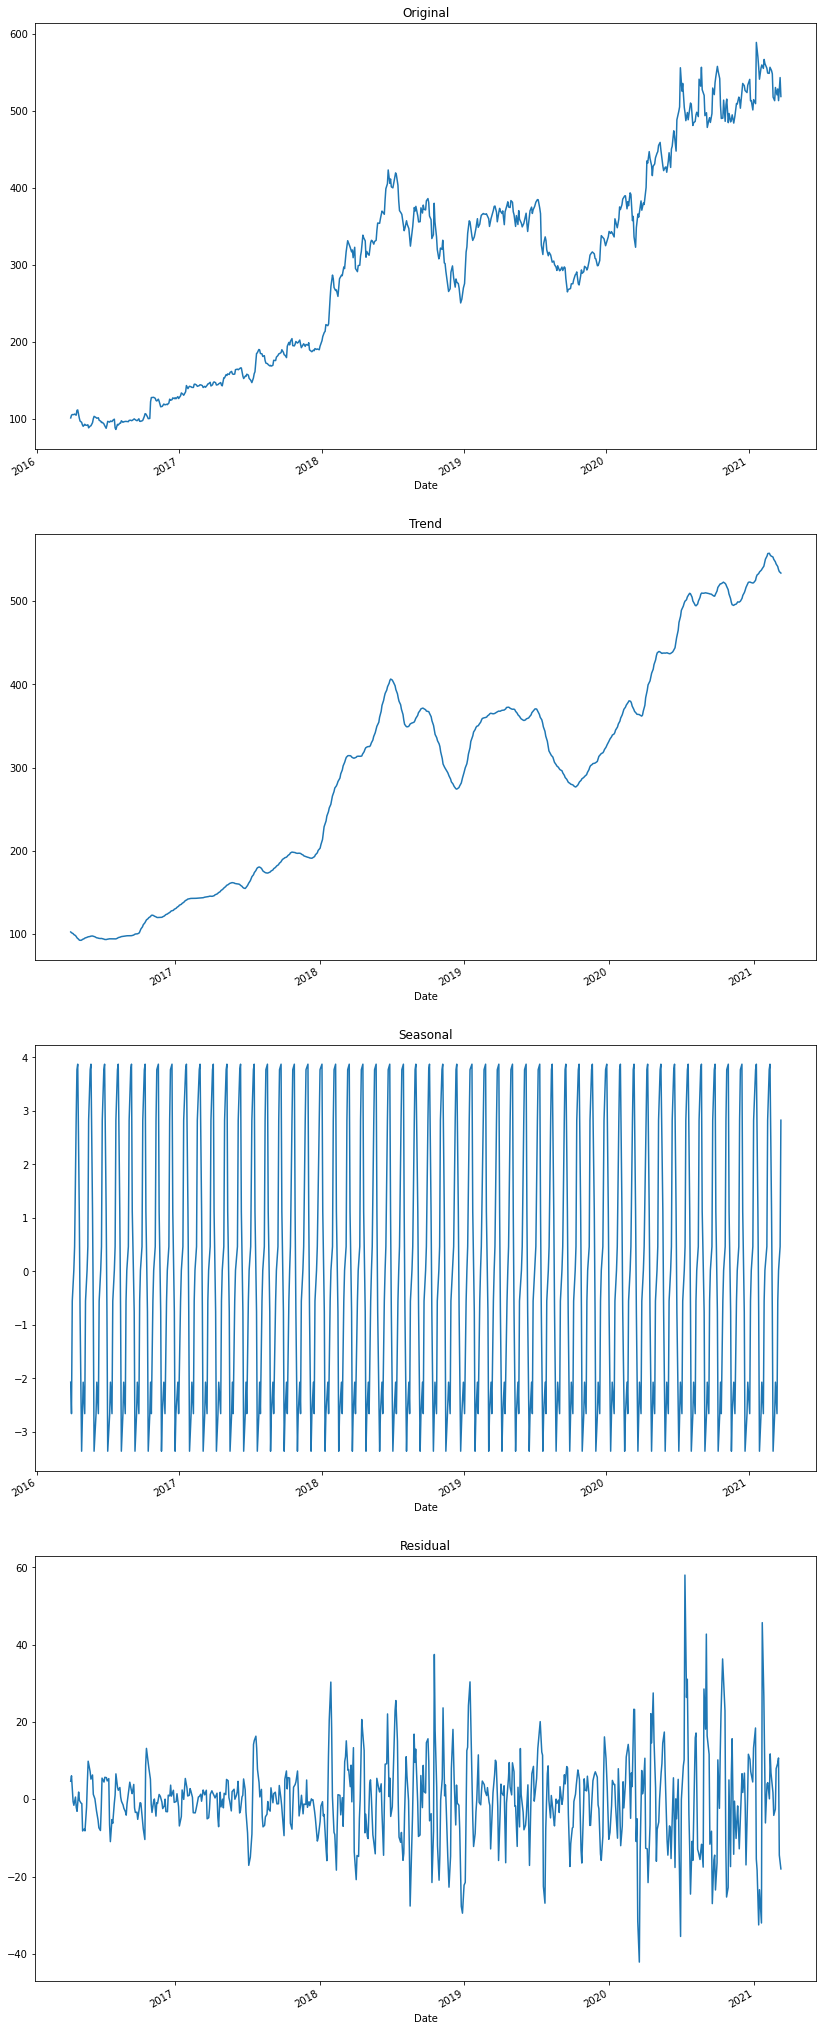

In [68]:
# Разложим ряд на компоненты и проверим ответы на вопросы
SHIFT = 12

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['High']], period=SHIFT)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

# **Пытаемся избавиться от тренда**

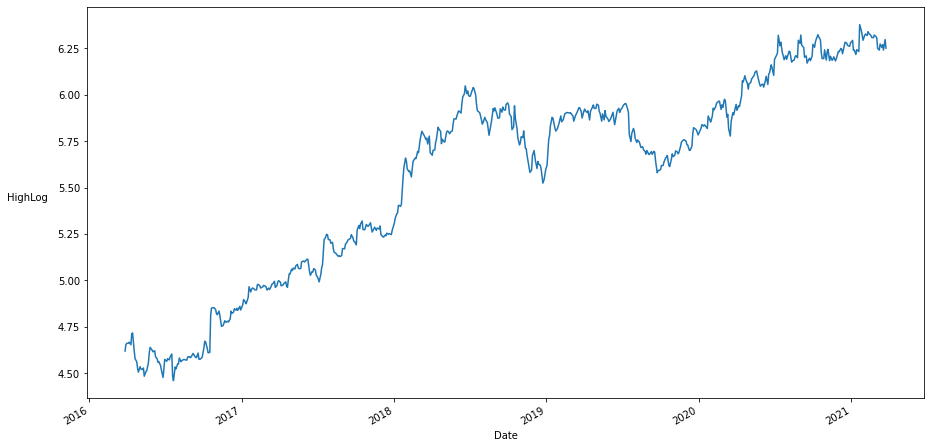

In [69]:
df['HighLog'] = np.log(df['High'])

plt.figure(figsize=(15, 8))
plt.ylabel('HighLog', rotation=0, labelpad=30)
df['HighLog'].plot();

In [72]:
df['HighLogSDiff'] = df['HighLog'] - df['HighLog'].shift(SHIFT)
p_value = adfuller(df["HighLogSDiff"][SHIFT:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергается в пользу альтернативной'
)

# plt.figure(figsize=(15, 8))
# plt.ylabel('HighLogSDiff', rotation=0, labelpad=30)
# df['HighLogSDiff'].plot();

Полученный уровень значимости (p-value): 0.0003. 0.0003 < 0.05. Нулевая гипотеза отвергается в пользу альтернативной


/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


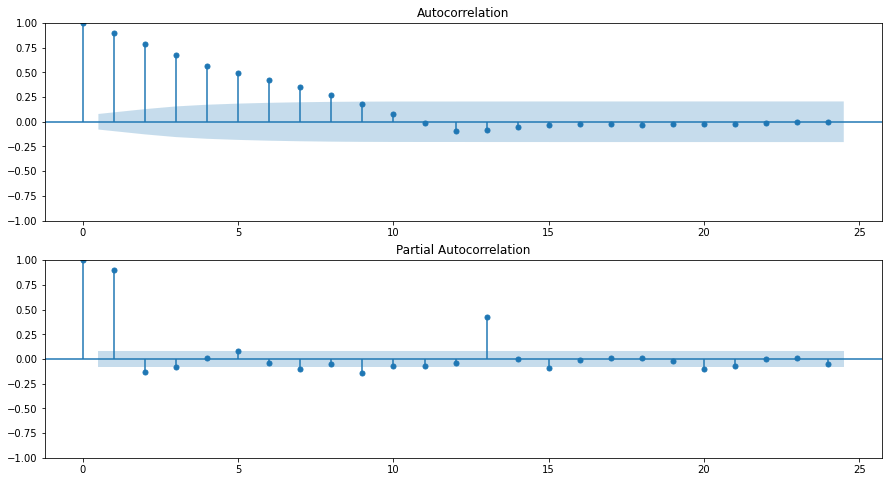

In [73]:
plt.figure(figsize=(15,8))

ax = plt.subplot(211)
statsmodels.graphics.tsaplots.plot_acf(df['HighLogSDiff'][SHIFT:], lags=24, ax=ax)

ax = plt.subplot(212)
statsmodels.graphics.tsaplots.plot_pacf(df['HighLogSDiff'][SHIFT:], lags=24, ax=ax);

## **SARIMA**


In [74]:
d=1
D=1

qs = range(1, 5)
Qs = range(1, 3)

ps = range(1, 5)
Ps = range(3, 5)

In [75]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

64

In [76]:
%%time
#warnings.filterwarnings('ignore')
import statsmodels.api as sm

df_train = df.drop(df.tail(12).index, inplace=False)

results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            df_train['HighLog'], 
            order=(param[0], d, param[1]), 
            seasonal_order=(param[2], D, param[3], SHIFT)
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

#warnings.filterwarnings('default')

  0%|                                                    | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  2%|▋                                           | 1/64 [00:04<05:03,  4.81s/it]/usr/local/lib/python3.9/site-packages/statsmodels/tsa/ba

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 16%|██████▋                                    | 10/64 [01:54<10:46, 11.98s/it]/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to conve

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 30%|████████████▊                              | 19/64 [04:02<10:24, 13.87s/it]/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive par

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 44%|██████████████████▊                        | 28/64 [06:22<10:23, 17.33s/it]/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to conve

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 59%|█████████████████████████▌                 | 38/64 [08:40<05:48, 13.39s/it]/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to conve

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 75%|████████████████████████████████▎          | 48/64 [11:21<04:35, 17.24s/it]/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to conve

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 91%|██████████████████████████████████████▉    | 58/64 [13:52<01:35, 15.98s/it]/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to conve

CPU times: user 54min 26s, sys: 7min 50s, total: 1h 2min 16s
Wall time: 15min 46s


In [30]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters        aic
0   (1, 1, 3, 1) -41.478849
4   (1, 2, 3, 1) -39.827083
16  (2, 1, 3, 1) -39.797824
2   (1, 1, 4, 1) -39.478847
1   (1, 1, 3, 2) -39.478838


In [77]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            HighLog   No. Observations:                  618
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                1192.718
Date:                            Wed, 03 Nov 2021   AIC                          -2365.436
Time:                                    15:45:42   BIC                          -2321.384
Sample:                                         0   HQIC                         -2348.294
                                            - 618                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1796      0.196      6.014      0.000       0.795       1.564
ar.L2         -0.7195      0.216   

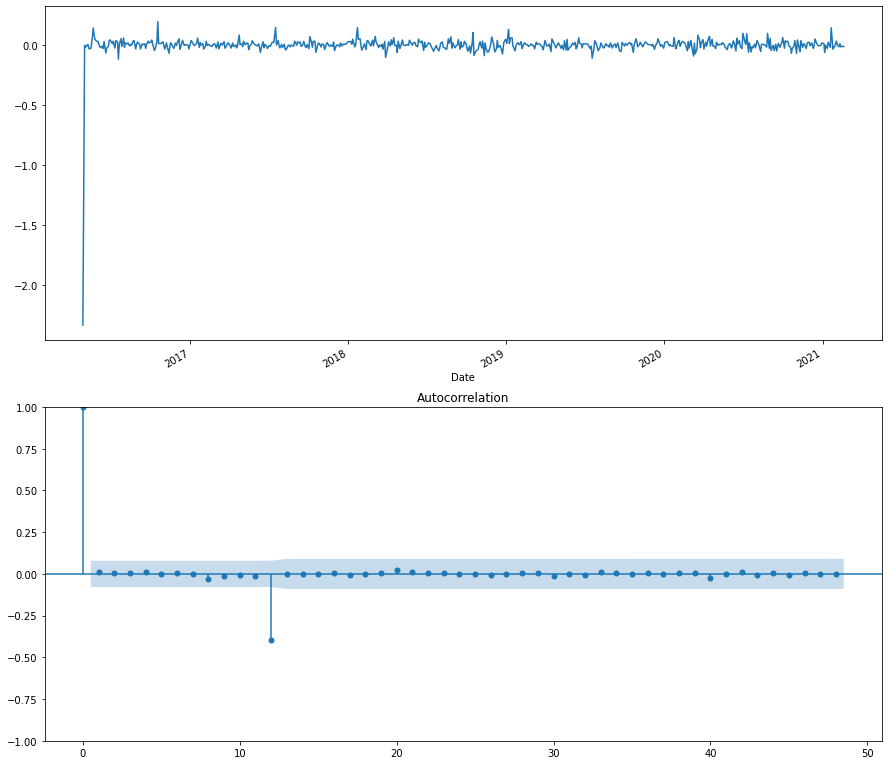

In [78]:
plt.figure(figsize=(15,15))

plt.subplot(211)
best_model.resid[SHIFT:].plot()

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid.values.squeeze(), lags=48, ax=ax);

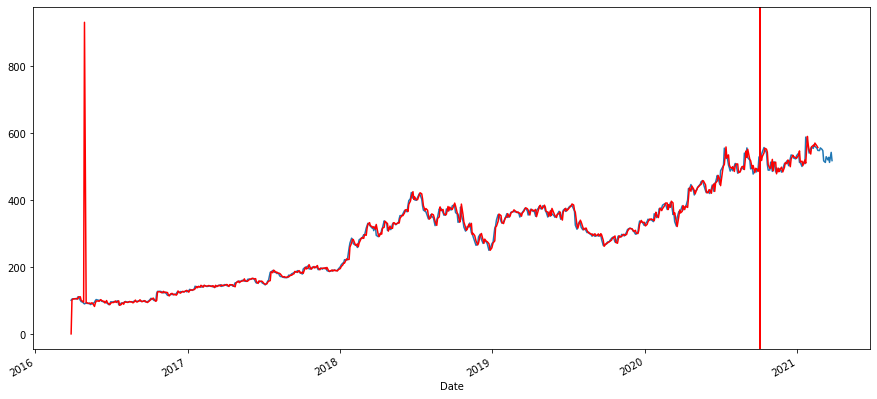

In [79]:
df['Model'] = np.exp(best_model.fittedvalues)

plt.figure(figsize=(15,7))

df['High'].plot()
df['Model'].plot(c='r');
plt.axvline(pd.to_datetime('2020-10-04'), color='r', linestyle='-', lw=2)

# **Тестирование модели**

In [80]:
PREDICT_LEN = 12
DATASET_SIZE = df.shape[0]

new_close_value = df[['High', 'Model']]
future_date = [
    datetime.datetime.strptime("2021-10-08", "%Y-%m-%d") + relativedelta(months=x)
    for x in range(0, PREDICT_LEN)
]

future_df = pd.DataFrame(index=future_date, columns=['High', 'Model'])
new_close_value = pd.concat([new_close_value, future_df])

print(new_close_value.shape)
new_close_value.tail()

(642, 2)


,High,Model
2022-05-08,NaN,NaN
2022-06-08,NaN,NaN
2022-07-08,NaN,NaN
2022-08-08,NaN,NaN
2022-09-08,NaN,NaN


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is 

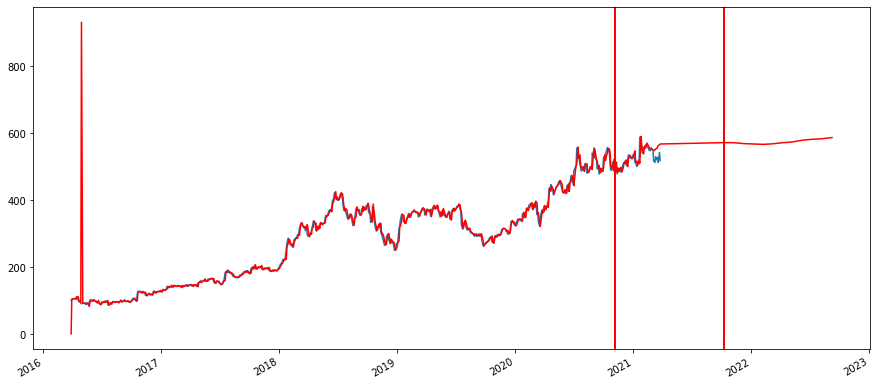

In [81]:
# future_df['Model'] = np.exp(best_model.predict(start=148, end=148 + predict_len - 1))
for i in range(DATASET_SIZE - PREDICT_LEN, DATASET_SIZE + PREDICT_LEN):
    new_close_value.iloc[i]['Model'] = np.exp(best_model.predict(i))
# print(new_close_value.iloc[148 - 12])

# new_close_value.tail(50)
plt.figure(figsize=(15,7))
new_close_value['High'].plot()
new_close_value['Model'].plot(c='r');
plt.axvline(pd.to_datetime('2020-11-04'), color='r', linestyle='-', lw=2)
plt.axvline(pd.to_datetime('2021-10-08'), color='r', linestyle='-', lw=2)

In [82]:
predicted_df = new_close_value.iloc[DATASET_SIZE - PREDICT_LEN : DATASET_SIZE]
actual = predicted_df['High'].to_numpy()
predicted = predicted_df['Model'].to_numpy()

In [83]:
def mape(actual, pred): 
    return np.mean(np.abs((actual - pred) / actual)) * 100

print("MAPE: ", mape(actual, predicted))

MAPE:  4.598704663607295
